In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca, filter_data_labels
from src.concept_vectors import *
from src.util import *
import seaborn as sns
from src.dataset import * 

2022-12-12 14:36:27.150453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
analyzed_attributes = ["{}_color".format(i) for i in range(4)]
analyzed_attributes += ["{}_number".format(i) for i in range(4)]
analyzed_attributes += ["spurious"]

## Retrieve CBM Concept Vectors (from labels)

In [5]:
concept_vectors_cbm = []
concept_metadata_cbm = []

In [8]:
for attribute in analyzed_attributes: 
    cbm_vector = create_vector_from_label_mnist(attribute)
    concept_vectors_cbm += list(cbm_vector)
    concept_metadata_cbm+=[{'concept': attribute}]
concept_vectors_cbm = np.array(concept_vectors_cbm)

In [9]:
label_by_concept_cbm = [i['concept'] for i in concept_metadata_cbm]

## Plot all Data

### Dimensionality Reduced Plots 

Text(27.0, 0.5, 'Axis 2')

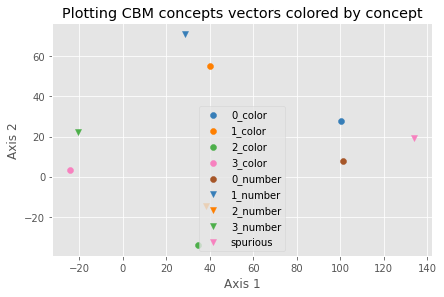

In [10]:
plt.title("Plotting CBM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cbm,label_by_concept_cbm)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

### Heatmap

Text(0.5, 1.0, 'Heatmap of average cosine distances between CBM vectors for MNIST attributes, in Latent space')

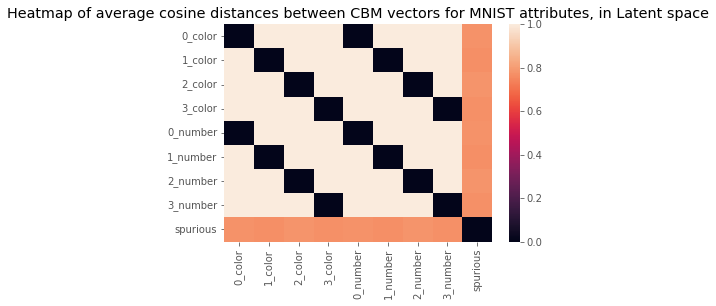

In [11]:
cosine_by_class_raw = find_average_distances(concept_vectors_cbm,encode_list(label_by_concept_cbm),cosine_metric=True)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cbm),
            yticklabels=find_unique_in_order(label_by_concept_cbm))
plt.title("Heatmap of average cosine distances between CBM vectors for MNIST attributes, in Latent space")